In [9]:
import numpy as np
import math
from matplotlib import pyplot as plt

def load_data(file_path, delimiter, skiprows=0):
    """loads a data file and returns a numpy array"""
    file = open(file_path, "rb")
    arr = np.loadtxt(file, delimiter=delimiter, skiprows=skiprows)
    return arr

In [10]:
data = load_data("breast-cancer-wisconsin.csv", ",")

In [11]:
for row in data:
    row[-1] = 0 if row[-1] == 2 else 1

In [12]:
X=data[:,1:10]
Y=np.ravel((data[:,-1:]))

In [241]:
class LogisticRegression:
    def __init__(self, alpha=0.001, threshold = 0.00005):
        self.alpha = alpha
        self.threshold = threshold
        self.stop = False
        self.weights = None
        self.change = []

    def __intercept(self, X):
        return np.c_[np.ones(len(X)), X]
    
    def __sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def __grad(self, X_i, y_i):
        z = np.dot(self.weights.T, X_i)
        return X_i*(y_i-self.__sigmoid(z))
    
    def __update(self, X, Y):
        changeW = np.zeros(np.size(X, 1))

        for i in range(len(X)):
            grad = self.__grad(X[i], Y[i])
            changeW = changeW + self.alpha*grad
        self.change.append(np.linalg.norm(changeW))
        self.weights = self.weights + changeW
    
    def fit(self, X, Y):
        padded_X = self.__intercept(X)
        self.weights = np.zeros(np.size(padded_X,1))
        
        num_iter = 0
        while self.change == [] or self.change[-1] > self.threshold:
            self.__update(padded_X, Y)
            num_iter+=1

        print(f"learning rate:{self.alpha} \n stop threshold:{self.threshold} \n number of iterations: {num_iter}")
        return self.weights
    
    def predict(self, X):
        padded_X = self.__intercept(X)
        return self.__sigmoid(np.dot(self.weights.T, padded_X)).round()

In [242]:
lr = LogisticRegression()

lr.fit(X,Y)

learning rate:0.001 
 stop threshold:5e-05 
 number of iterations: 4796


array([-1.00350762e+01,  5.30065212e-01, -3.94615938e-03,  3.21919023e-01,
        3.27854728e-01,  9.47186726e-02,  3.82196104e-01,  4.42993090e-01,
        2.12290548e-01,  5.27506984e-01])

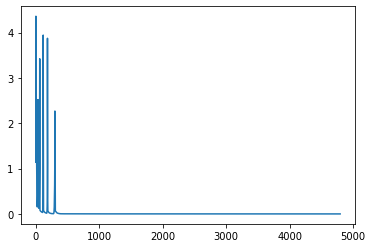

In [243]:
plt.plot(lr.change)